In [146]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [148]:
df = pd.read_csv('output2.csv')

In [149]:
df.head()

,Year,Human Development Index(HDI),High-technology exports (manufactured exports),Export value index,Merchandise exports (current US$),Insurance and financial services (commercial service exports),Agricultural raw materials exports (merchandise exports),"Computer, communications and other services (commercial service imports)",Merchandise trade (GDP),"International tourism, receipts for travel items (current US$)"
0,2000,0.396,NaN,15.179477,734000000,2.954466,11.080983,8.907536,16.880519,377000000.0
1,2001,0.404,NaN,17.612496,851000000,2.267579,9.633749,14.237834,18.889124,615000000.0
2,2002,0.414,NaN,20.266887,980000000,2.733028,7.769325,10.527840,18.677689,635000000.0
3,2003,0.425,NaN,25.159822,1216000000,2.656140,7.912219,11.031455,21.956113,647000000.0
4,2004,0.435,NaN,30.601014,1479000000,2.599588,9.018777,18.141959,25.211651,746000000.0


In [150]:
df.shape

(23, 10)

In [151]:
df.describe


<bound method NDFrame.describe of     Year  Human Development Index(HDI)  \
0   2000                         0.396   
1   2001                         0.404   
2   2002                         0.414   
3   2003                         0.425   
4   2004                         0.435   
5   2005                         0.445   
6   2006                         0.455   
7   2007                         0.464   
8   2008                         0.472   
9   2009                         0.482   
10  2010                         0.493   
11  2011                         0.498   
12  2012                         0.501   
13  2013                         0.504   
14  2014                         0.506   
15  2015                         0.507   
16  2016                         0.509   
17  2017                         0.517   
18  2018                         0.525   
19  2019                         0.533   
20  2020                         0.535   
21  2021                         0.529   


In [152]:
df.isnull().sum()

Year                                                                        0
Human Development Index(HDI)                                                0
High-technology exports (manufactured exports)                              8
Export value index                                                          1
Merchandise exports (current US$)                                           0
Insurance and financial services (commercial service exports)               2
Agricultural raw materials exports (merchandise exports)                    0
Computer, communications and other services (commercial service imports)    2
Merchandise trade (GDP)                                                     0
International tourism, receipts for travel items (current US$)              3
dtype: int64

In [153]:
null_percentage = df.isnull().mean() * 100
print(null_percentage)

Year                                                                         0.000000
Human Development Index(HDI)                                                 0.000000
High-technology exports (manufactured exports)                              34.782609
Export value index                                                           4.347826
Merchandise exports (current US$)                                            0.000000
Insurance and financial services (commercial service exports)                8.695652
Agricultural raw materials exports (merchandise exports)                     0.000000
Computer, communications and other services (commercial service imports)     8.695652
Merchandise trade (GDP)                                                      0.000000
International tourism, receipts for travel items (current US$)              13.043478
dtype: float64


In [154]:
df.fillna(df.mean(), inplace=True)

In [155]:
def z_score(series):
    return (series - series.mean()) / series.std()

threshold = 3
outliers = df.iloc[:, 2:].apply(z_score).abs() > threshold
print("Outliers identified using Z-score method:")
print(outliers)

Outliers identified using Z-score method:
    High-technology exports (manufactured exports)  Export value index   \
0                                            False                False   
1                                            False                False   
2                                            False                False   
3                                            False                False   
4                                            False                False   
5                                            False                False   
6                                            False                False   
7                                            False                False   
8                                            False                False   
9                                            False                False   
10                                           False                False   
11                                           False        

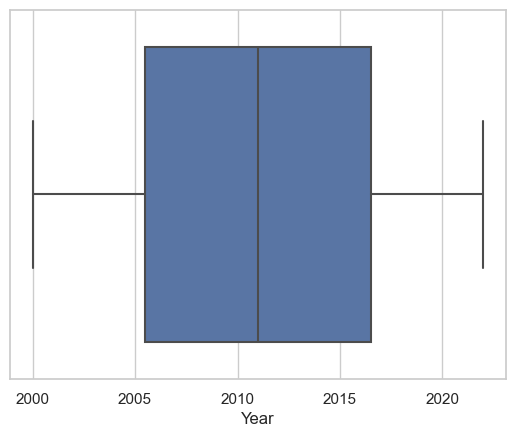

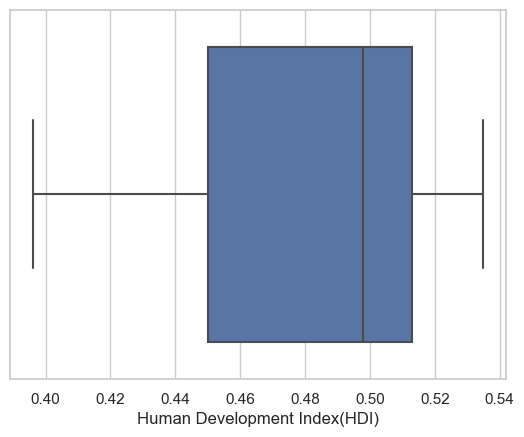

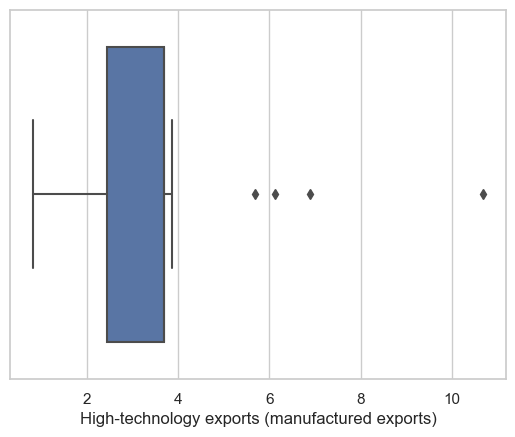

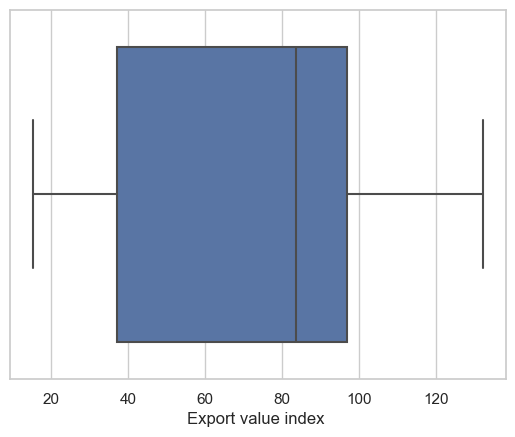

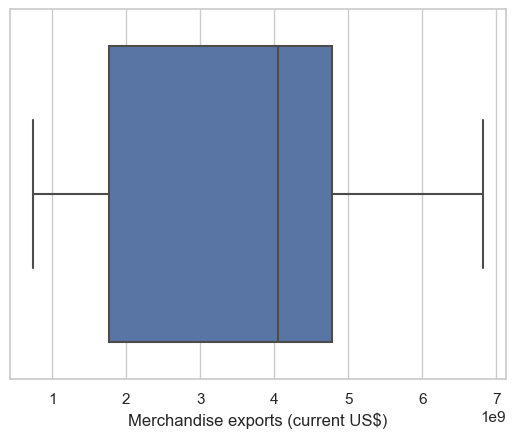

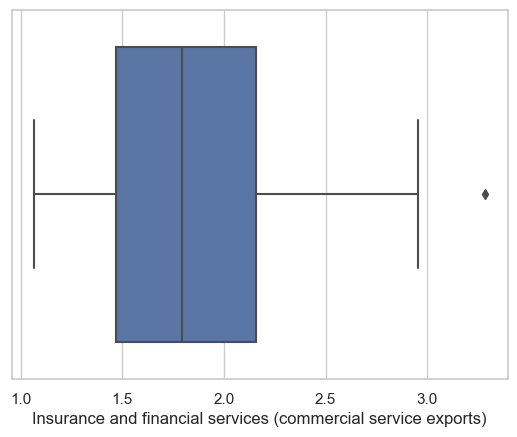

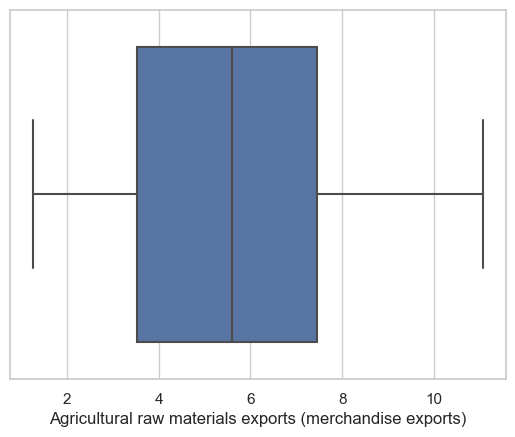

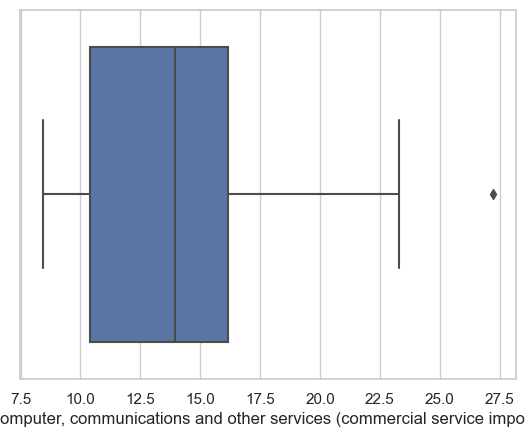

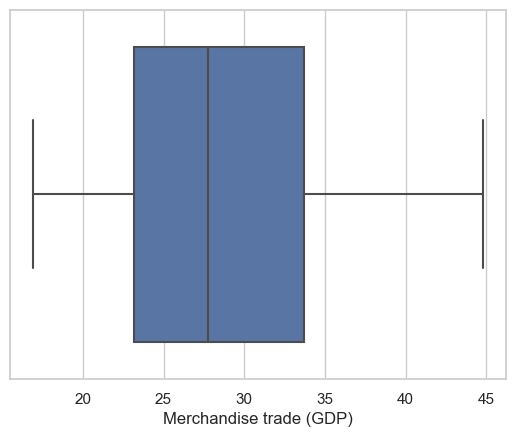

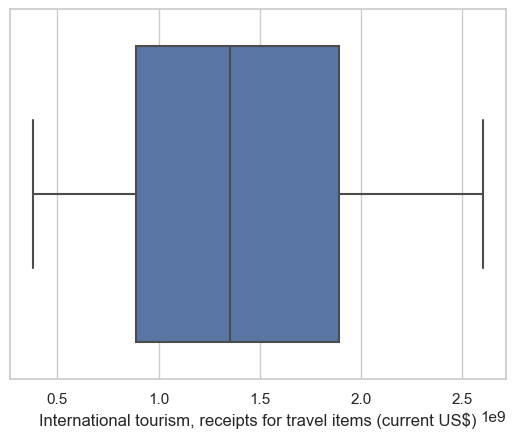

In [156]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from matplotlib import pyplot as plt
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [157]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,23.0,2.011000e+03,6.782330e+00,2.000000e+03,2.005500e+03,2.011000e+03,2.016500e+03,2.022000e+03
Human Development Index(HDI),23.0,4.817826e-01,4.391516e-02,3.960000e-01,4.500000e-01,4.980000e-01,5.130000e-01,5.350000e-01
High-technology exports (manufactured exports),23.0,3.691202e+00,2.108594e+00,8.156503e-01,2.438817e+00,3.691202e+00,3.691202e+00,1.068819e+01
Export value index,23.0,7.114095e+01,3.613898e+01,1.517948e+01,3.720596e+01,8.361253e+01,9.684969e+01,1.322135e+02
Merchandise exports (current US$),23.0,3.559304e+09,1.869379e+09,7.340000e+08,1.772000e+09,4.051000e+09,4.784500e+09,6.825000e+09
Insurance and financial services (commercial service exports),23.0,1.897753e+00,5.970276e-01,1.066165e+00,1.471010e+00,1.793493e+00,2.157739e+00,3.283959e+00
Agricultural raw materials exports (merchandise exports),23.0,5.778195e+00,2.654995e+00,1.248059e+00,3.529747e+00,5.593323e+00,7.446459e+00,1.108098e+01
"Computer, communications and other services (commercial service imports)",23.0,1.395163e+01,4.767018e+00,8.416449e+00,1.040766e+01,1.395163e+01,1.617724e+01,2.724470e+01
Merchandise trade (GDP),23.0,2.883638e+01,7.721972e+00,1.688052e+01,2.316019e+01,2.772509e+01,3.372480e+01,4.482193e+01
"International tourism, receipts for travel items (current US$)",23.0,1.399520e+09,6.278502e+08,3.770000e+08,8.870000e+08,1.353000e+09,1.891000e+09,2.604400e+09


In [158]:
df.select_dtypes(include="number").columns

Index(['Year', 'Human Development Index(HDI)',
       'High-technology exports (manufactured exports)', 'Export value index ',
       'Merchandise exports (current US$)',
       'Insurance and financial services (commercial service exports)',
       'Agricultural raw materials exports (merchandise exports)',
       'Computer, communications and other services (commercial service imports)',
       'Merchandise trade (GDP)',
       'International tourism, receipts for travel items (current US$)'],
      dtype='object')

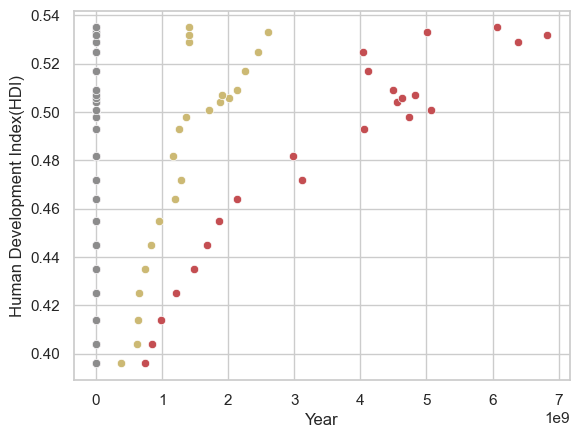

In [159]:
for i in [ 'Year',
       'High-technology exports (manufactured exports)', 'Export value index ',
       'Merchandise exports (current US$)',
       'Insurance and financial services (commercial service exports)',
       'Agricultural raw materials exports (merchandise exports)',
       'Computer, communications and other services (commercial service imports)',
       'Merchandise trade (GDP)',
       'International tourism, receipts for travel items (current US$)']:
    sns.scatterplot(data=df,x=i,y='Human Development Index(HDI)')

<Axes: >

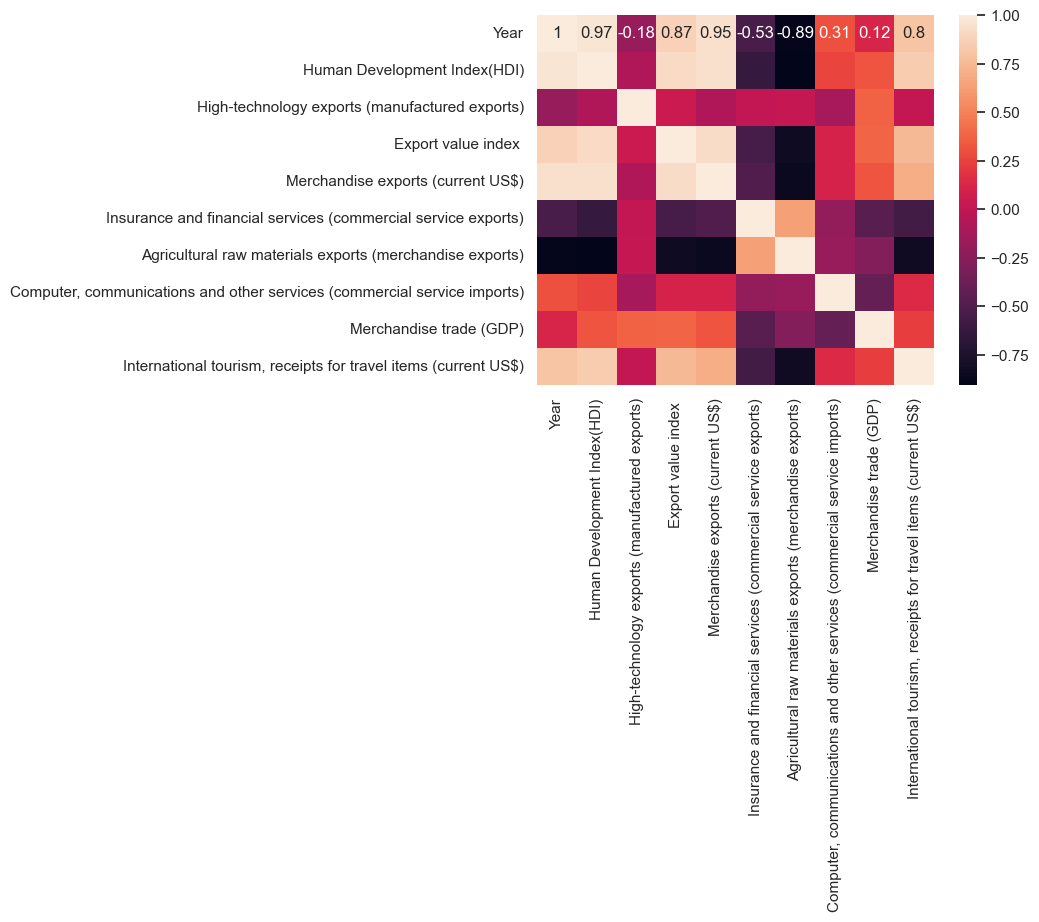

In [160]:
s=df.select_dtypes(include="number").corr()
sns.heatmap(s,annot=True)

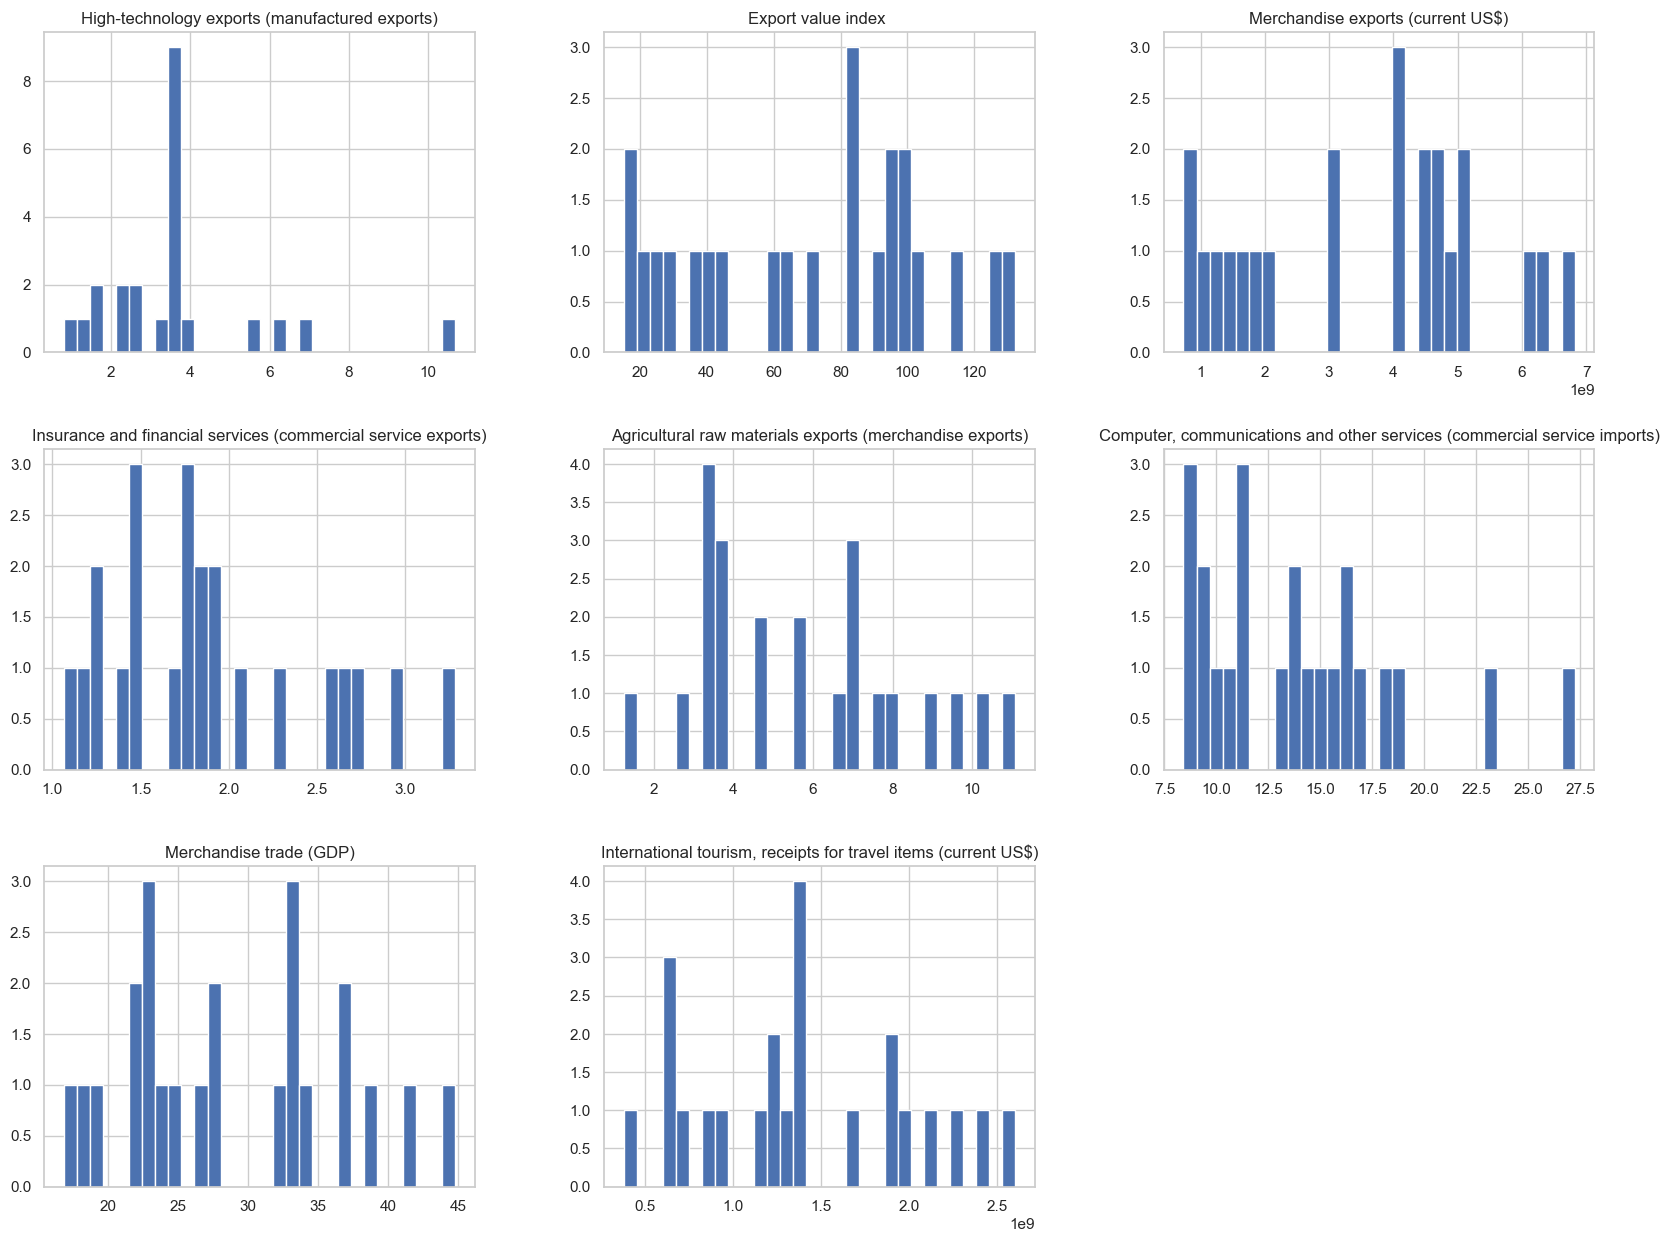

In [161]:
# Histogram
df.iloc[:, 2:].hist(bins=30, figsize=(20, 15))
plt.show()

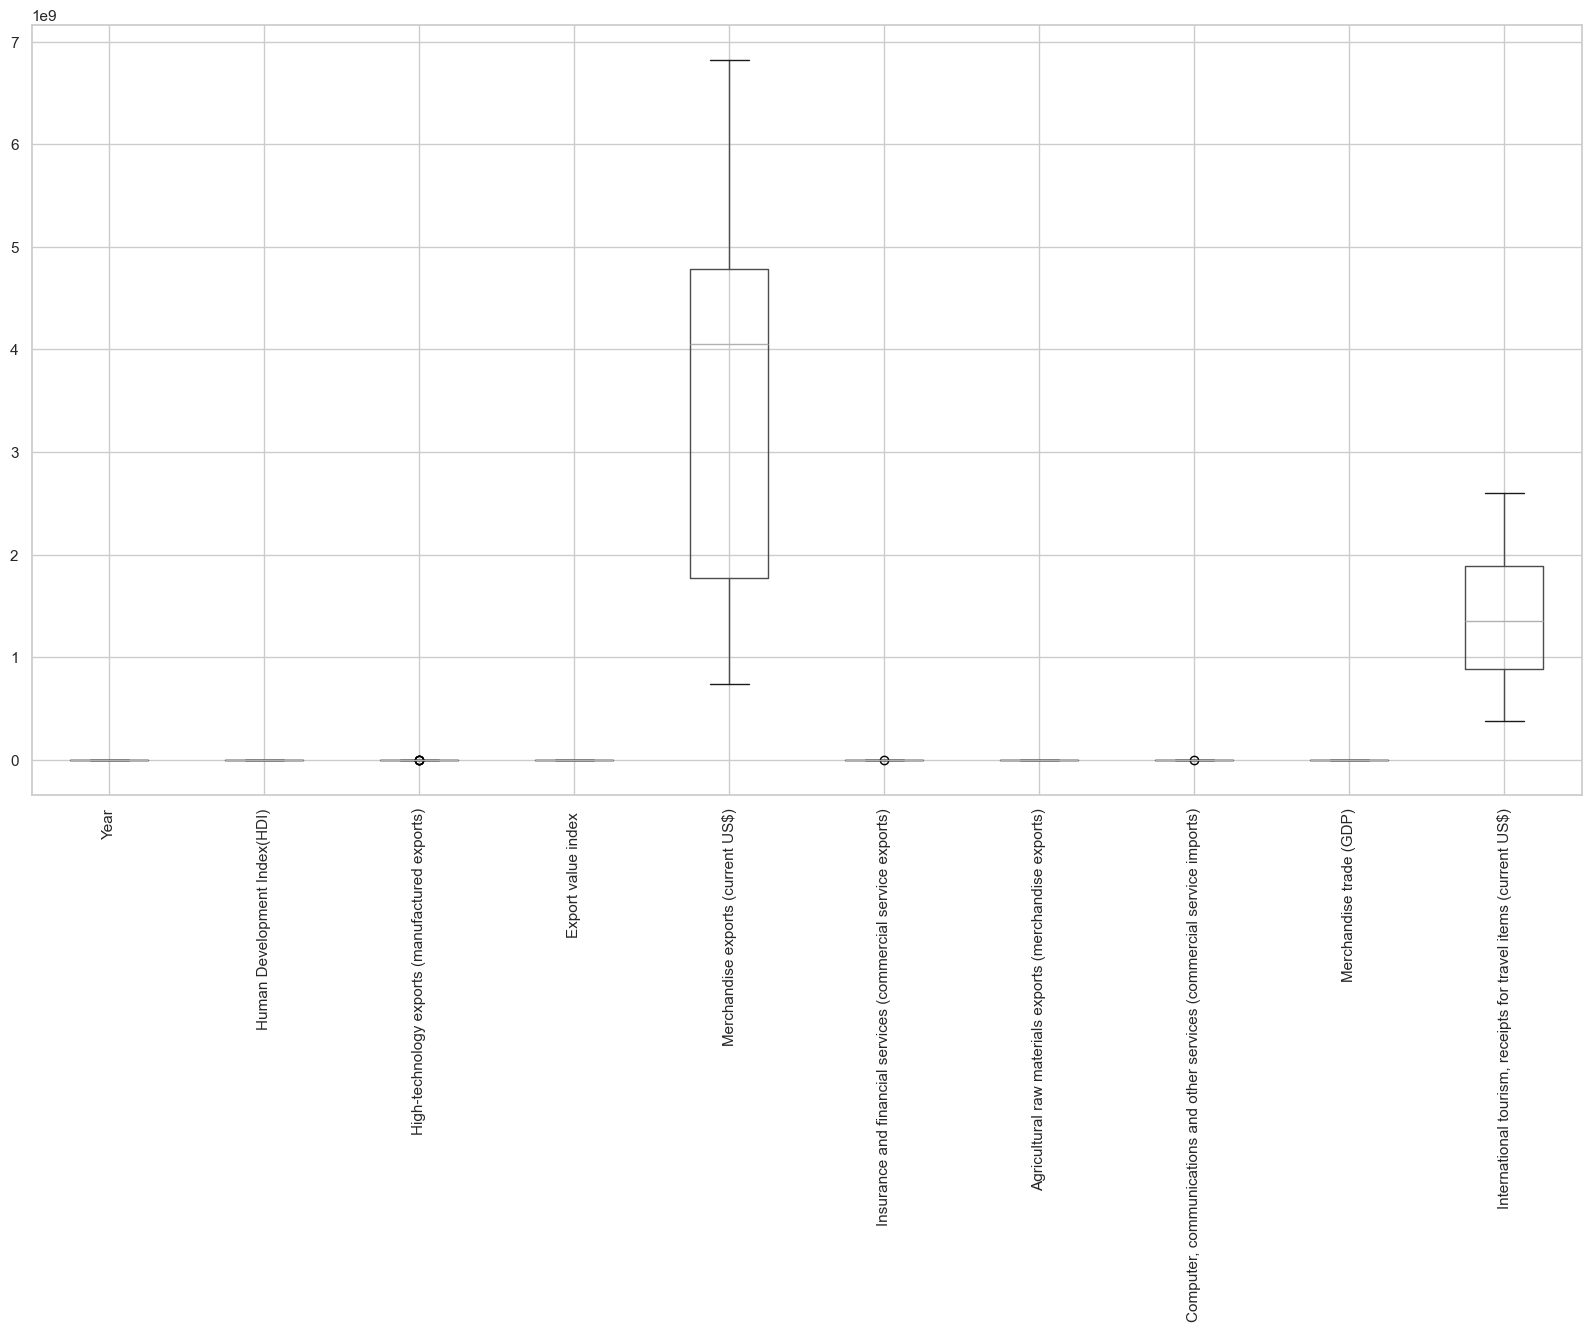

In [162]:
# Box Plot
df.boxplot(figsize=(20, 10))
plt.xticks(rotation=90)
plt.show()

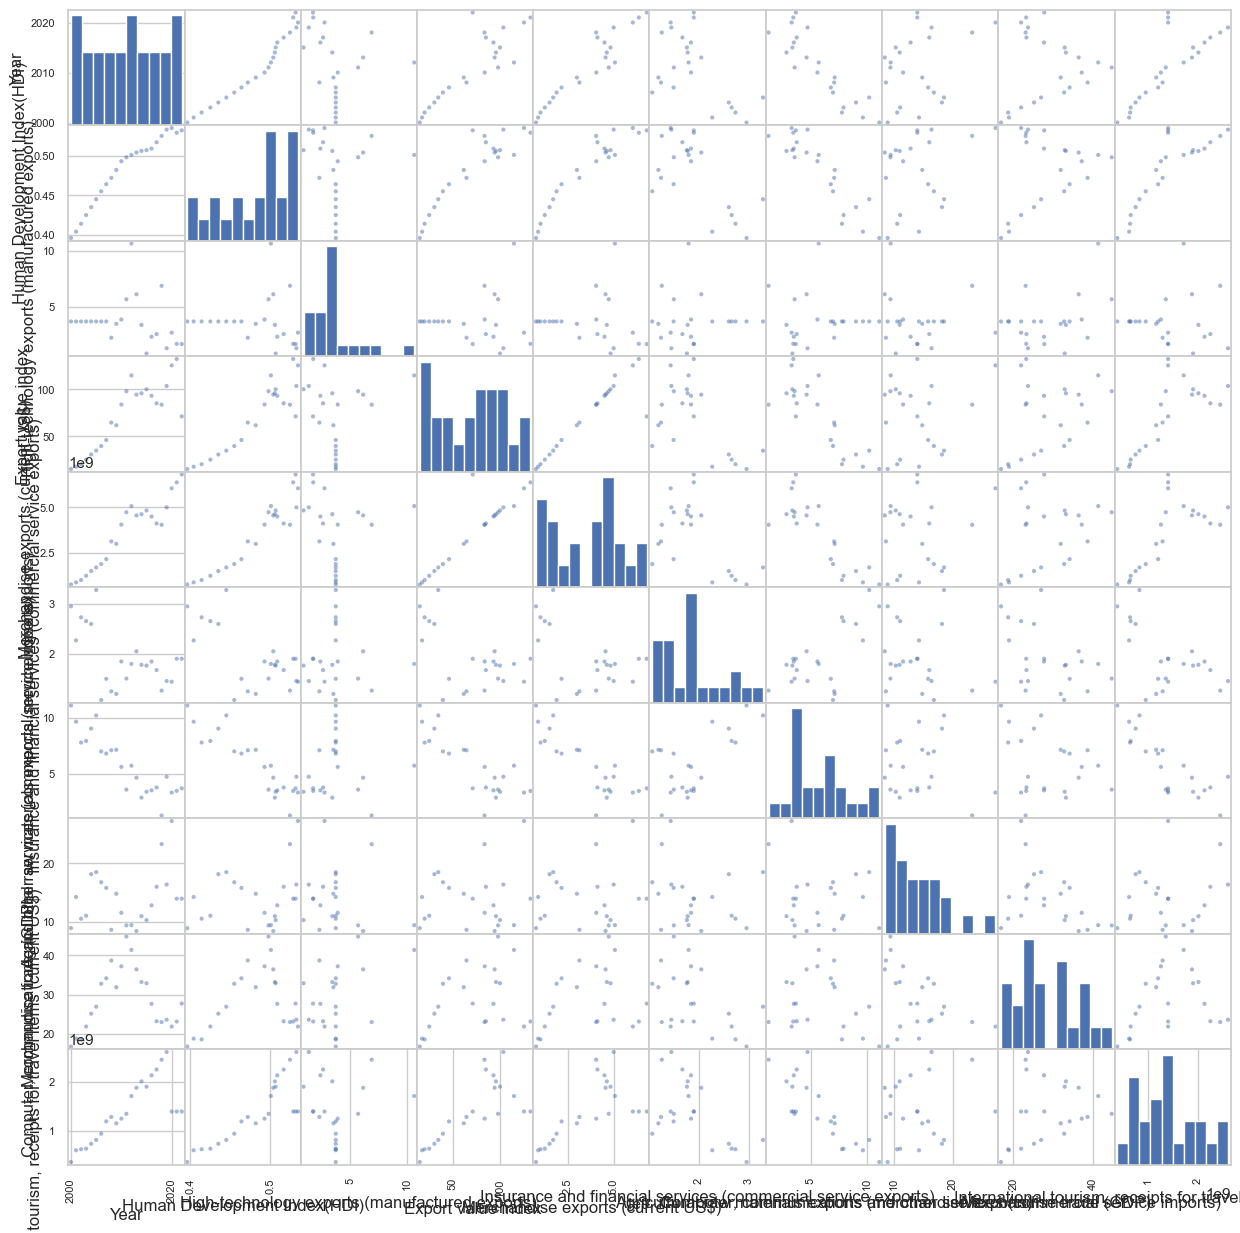

In [163]:
# Scatter Matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(15, 15))
plt.show()

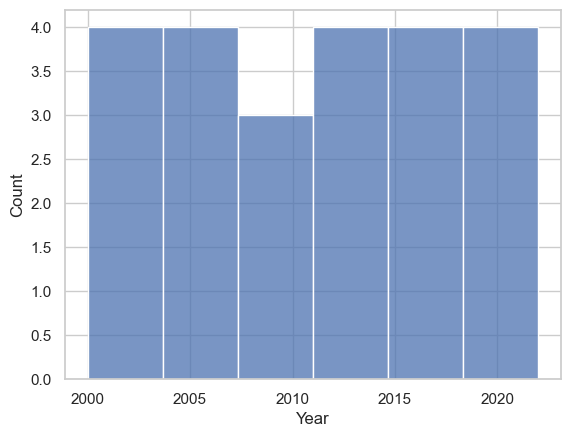

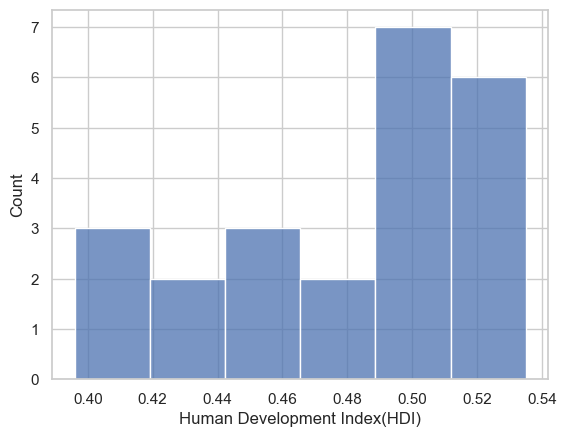

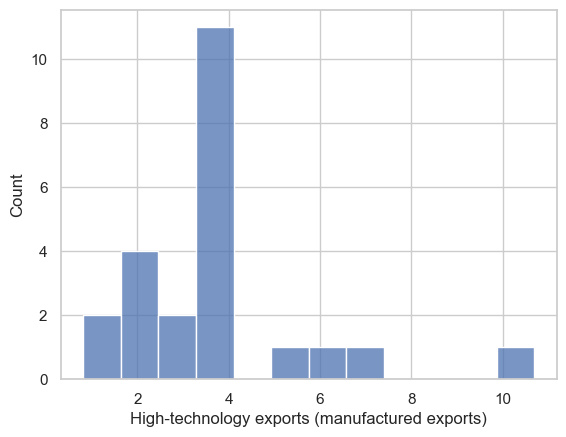

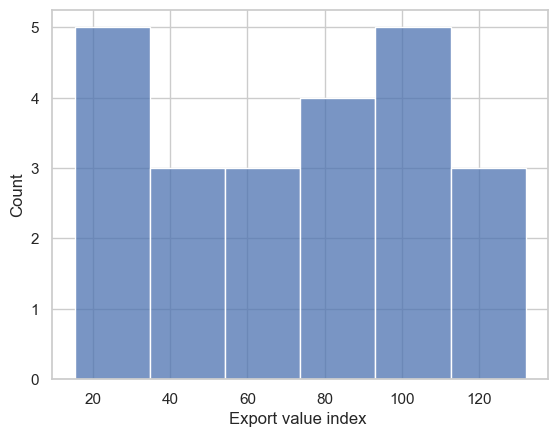

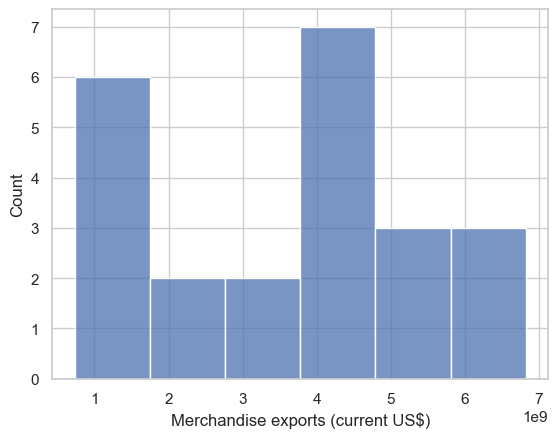

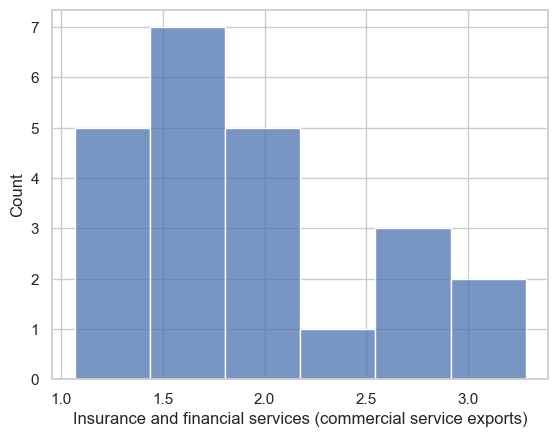

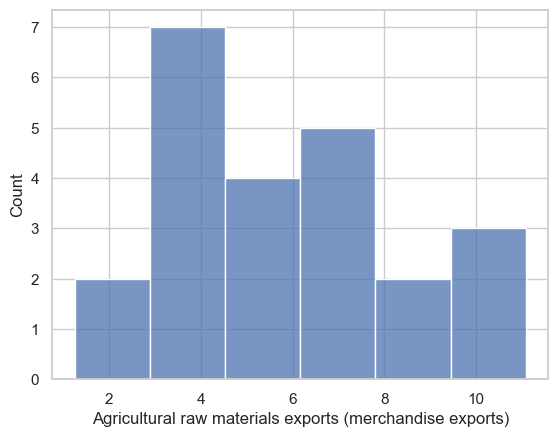

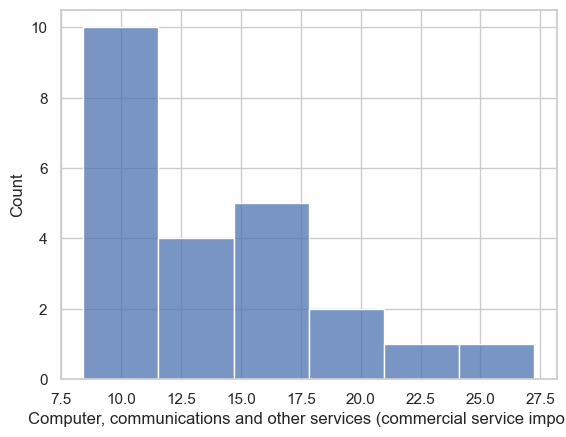

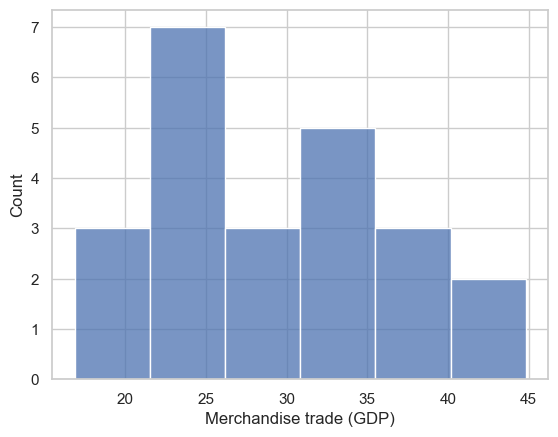

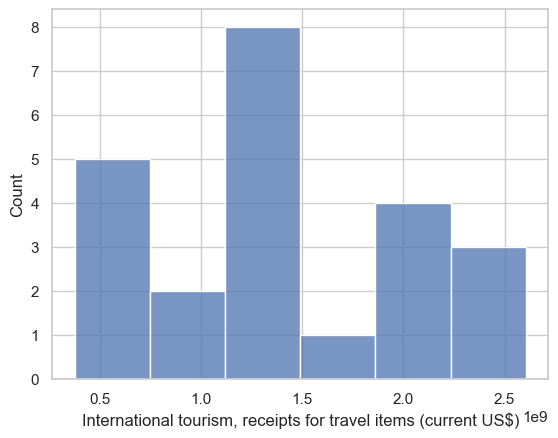

In [164]:
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()

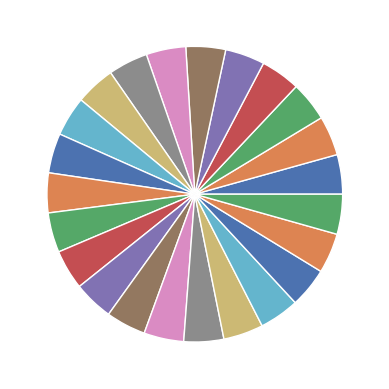

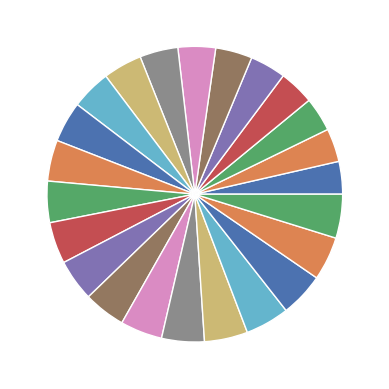

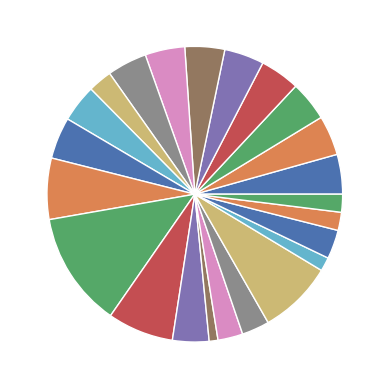

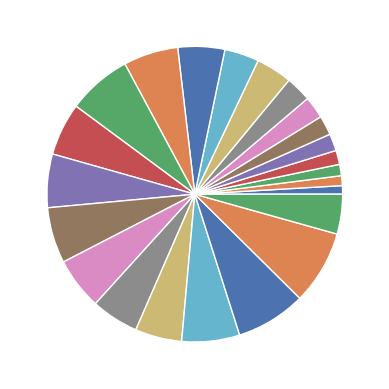

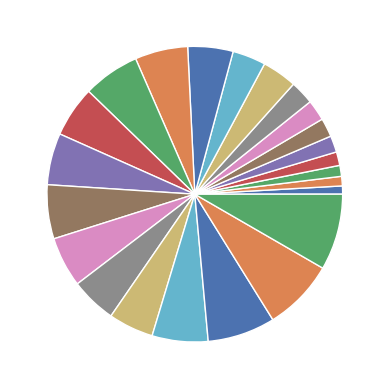

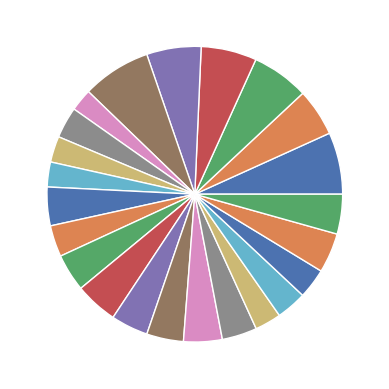

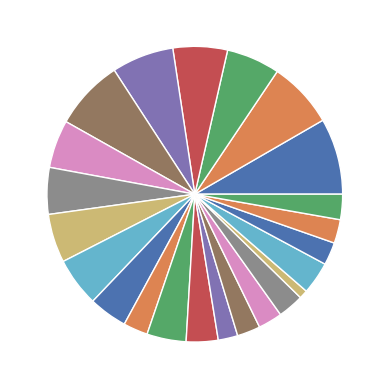

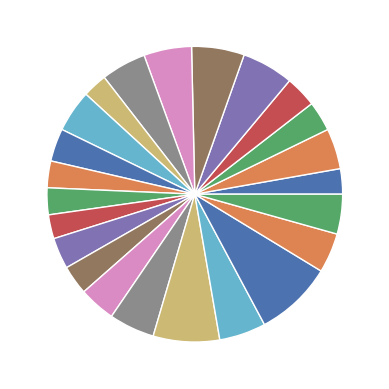

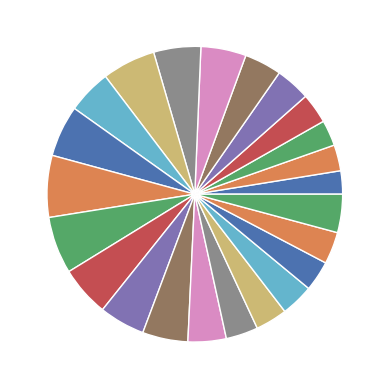

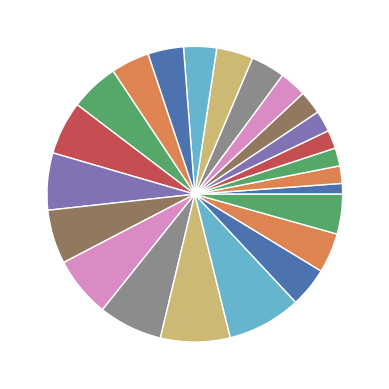

In [165]:
for i in df.select_dtypes(include="number").columns:
    plt.pie(data=df,x=i)
    plt.show()

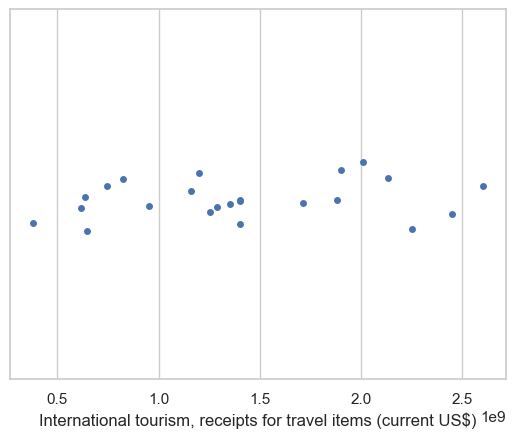

In [166]:
sns.set_theme(style="whitegrid")
sns.stripplot(x=i, data=df)
plt.show()

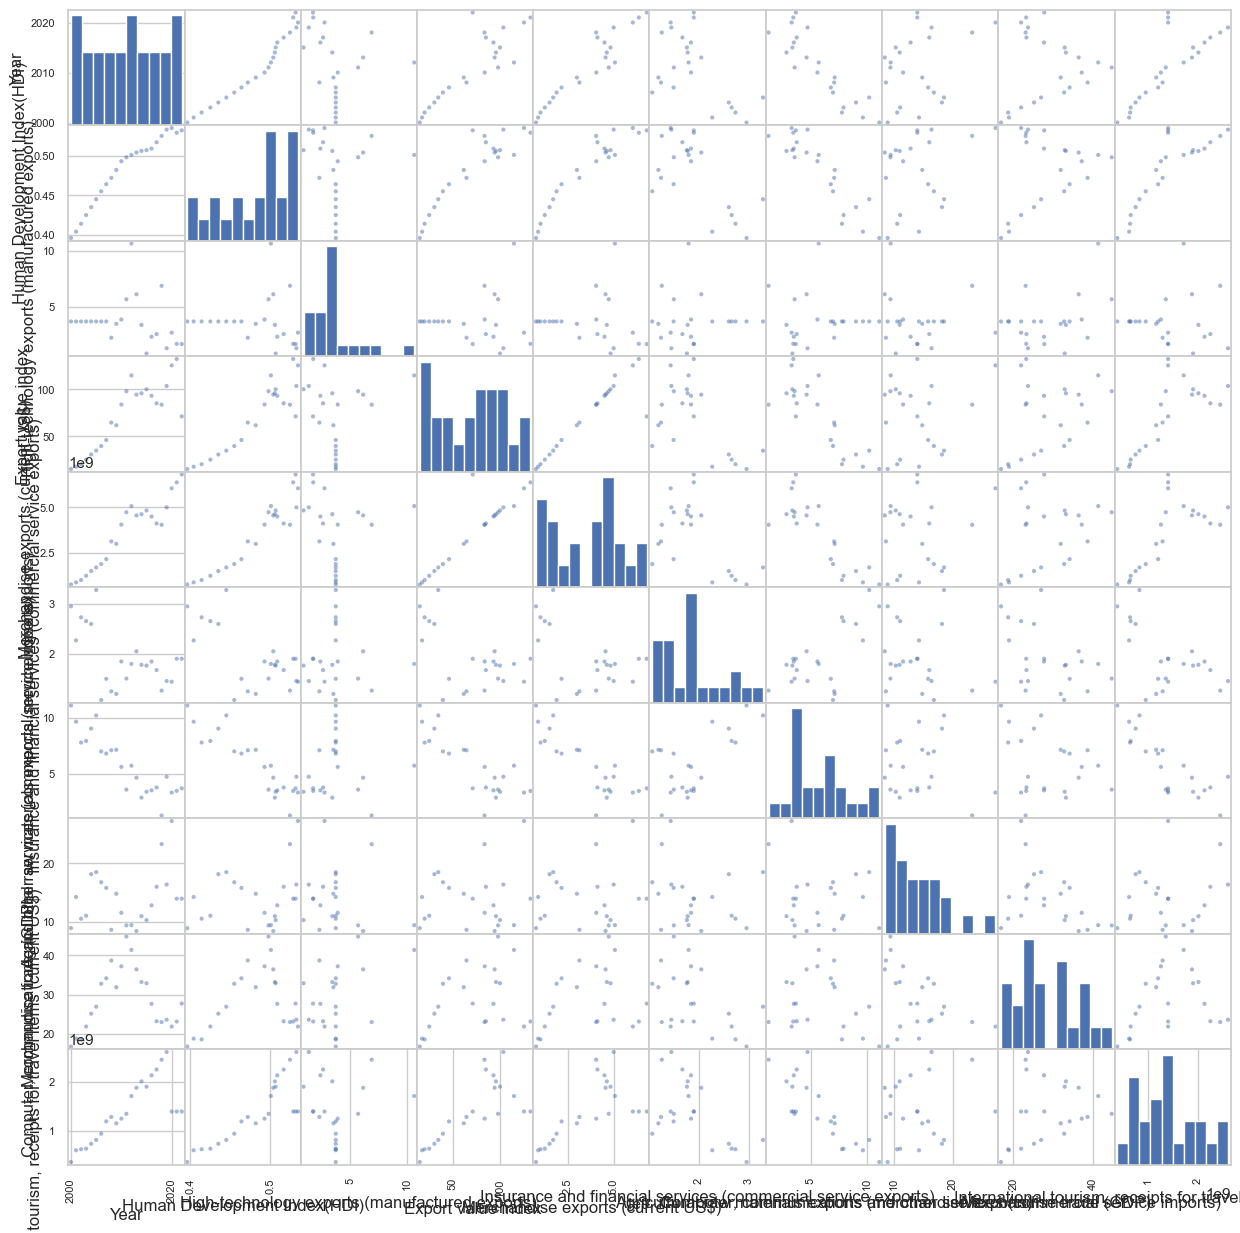

In [167]:
scatter_matrix(df, figsize=(15, 15))
plt.show()

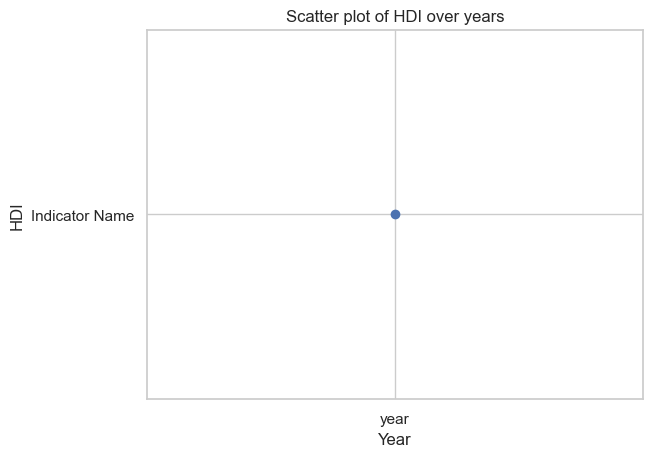

In [168]:
plt.scatter(x="year",y="Indicator Name" )
plt.title('Scatter plot of HDI over years')
plt.xlabel('Year')
plt.ylabel('HDI')
plt.show()

In [169]:
null_percentage = df.isnull().mean() * 100
print(null_percentage)

Year                                                                        0.0
Human Development Index(HDI)                                                0.0
High-technology exports (manufactured exports)                              0.0
Export value index                                                          0.0
Merchandise exports (current US$)                                           0.0
Insurance and financial services (commercial service exports)               0.0
Agricultural raw materials exports (merchandise exports)                    0.0
Computer, communications and other services (commercial service imports)    0.0
Merchandise trade (GDP)                                                     0.0
International tourism, receipts for travel items (current US$)              0.0
dtype: float64


In [170]:
# Prepare data for modeling
X = df[['Year',
       'High-technology exports (manufactured exports)', 'Export value index ',
       'Merchandise exports (current US$)',
       'Insurance and financial services (commercial service exports)',
       'Agricultural raw materials exports (merchandise exports)',
       'Computer, communications and other services (commercial service imports)',
       'Merchandise trade (GDP)',
       'International tourism, receipts for travel items (current US$)']]
y = df['Human Development Index(HDI)']

In [171]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [173]:
models = {
        'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

In [174]:
print(X_train)

    Year  High-technology exports (manufactured exports)  Export value index   \
12  2012                                       10.688192           114.766298   
1   2001                                        3.691202            17.612496   
13  2013                                        6.132481            94.311162   
5   2005                                        3.691202            34.738802   
2   2002                                        3.691202            20.266887   
11  2011                                        5.683594            97.961312   
20  2020                                        2.687440           125.401648   
3   2003                                        3.691202            25.159822   
4   2004                                        3.691202            30.601014   
18  2018                                        6.891609            83.612534   
16  2016                                        2.319270            93.094031   
21  2021                    

In [175]:
scores = {}


for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    score_percentage = score * 100
    scores[name] = score_percentage


for name, score in scores.items():
    print(f'{name}: {score:.2f}%')

Linear Regression: 98.20%
Decision Tree: 94.07%
Random Forest: 96.21%
Gradient Boosting: 98.64%
Support Vector Regression: -1.55%
K-Nearest Neighbors: 84.50%


In [185]:

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the trained model
with open('human_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [176]:

# Make predictions
y_pred = model.predict(X_test)

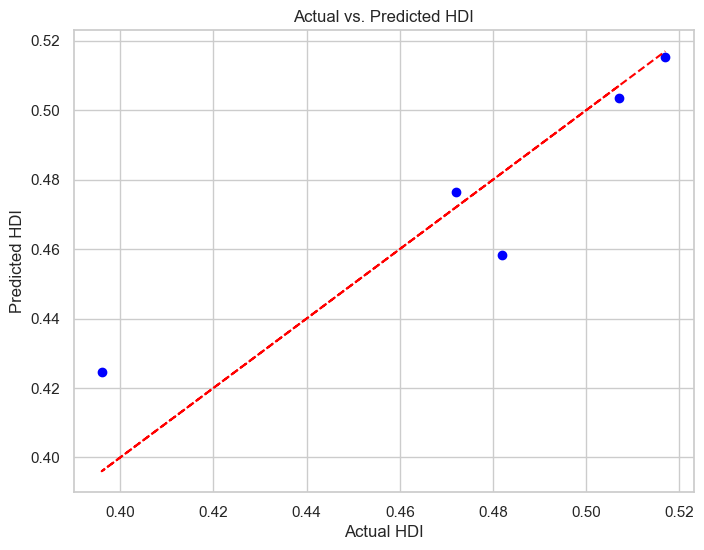

In [177]:
# Plot actual vs. predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.xlabel('Actual HDI')
plt.ylabel('Predicted HDI')
plt.title('Actual vs. Predicted HDI')
plt.grid(True)
plt.show()

In [183]:
import pickle

with open('human_model.pkl', 'wb') as file:
    pickle.dump(model, file)